In [4]:
# If necessary, install required libraries
# Run this cell separately in Jupyter or Colab
!pip install rdkit-pypi


import pandas as pd
import numpy as np
from rdkit import Chem
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'clintox2.csv'  # Provide the correct path
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Extract SMILES strings and labels
smiles = df['smiles']
labels = df['label']  # Ensure the 'label' column contains binary class values

# Tokenize SMILES strings
tokenizer = Tokenizer(char_level=True)  # Tokenize at character level
tokenizer.fit_on_texts(smiles)
sequences = tokenizer.texts_to_sequences(smiles)

# Pad sequences to uniform length
max_len = max(len(seq) for seq in sequences)  # Use the length of the longest SMILES
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Convert labels to numpy array
labels = labels.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


Dataset Preview:
                                              smiles  FDA_APPROVED  CT_TOX
0            *C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0


KeyError: 'label'

Dataset Preview:
                                              smiles  FDA_APPROVED  CT_TOX
0            *C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0

Columns in the dataset: Index(['smiles', 'FDA_APPROVED', 'CT_TOX'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 586ms/step - accuracy: 0.9431 - loss: 0.3093 - val_accuracy: 1.0000 - val_loss: 2.0789e-06
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step - accuracy: 1.0000 - loss: 1.2181e-04 - val_accuracy: 1.0000 - val_loss: 2.7291e-07
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 571ms/step - accuracy: 1.0000 - loss: 3.3619e-05 - val_accuracy: 1.0000 - val_loss: 1.7711e-07
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 627ms/step - accuracy: 1.0000 - loss: 7.6659e-05 - val_accuracy: 1.0000 - val_loss: 1.2992e-07
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 573ms/step - accuracy: 1.0000 - loss: 2.1753e-05 - val_accuracy: 1.0000 - val_loss: 1.0305e-07
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 599ms/step - accuracy: 1.0000 - loss: 4.6968e-05 - val_accuracy: 1.0000 - val_loss: 7.8838e-08
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 573ms/step - accuracy: 1.0000 - loss: 2.4253e-05 - val_accuracy: 1.0000 - val_loss: 5.7967e-08
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 658

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


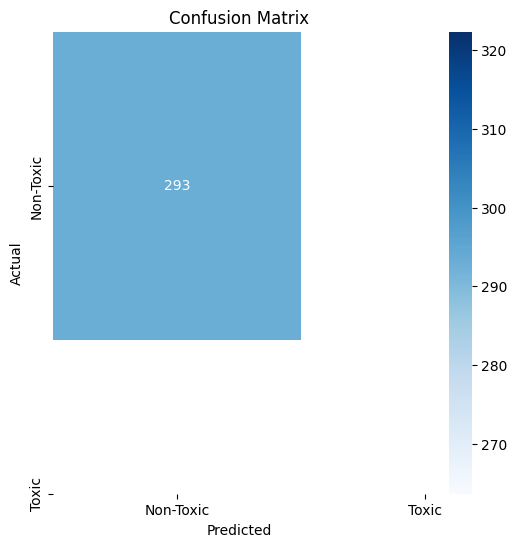

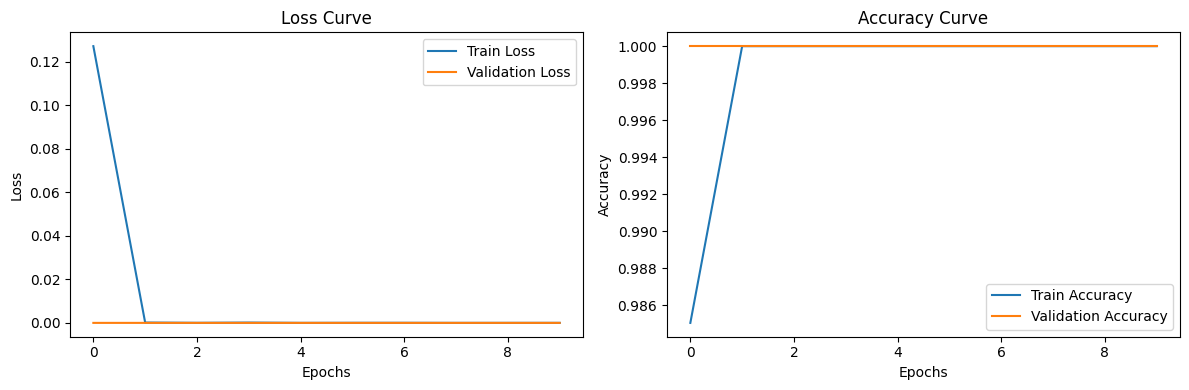

In [5]:
# Import necessary libraries

!pip install rdkit-pypi

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'clintox2.csv'  # Provide the correct path
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nColumns in the dataset:", df.columns)

# Select SMILES strings and one label column
smiles = df['smiles']
label_column = 'FDA_APPROVED'  # Change to 'CT_TOX' if needed
labels = df[label_column]  # Labels for classification

# Convert labels to binary if necessary (ensure 0 and 1 for binary classification)
labels = labels.apply(lambda x: 1 if x == 'Positive' else 0)  # Adjust for your dataset values

# Tokenize SMILES strings
tokenizer = Tokenizer(char_level=True)  # Tokenize at character level
tokenizer.fit_on_texts(smiles)
sequences = tokenizer.texts_to_sequences(smiles)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)  # Length of the longest SMILES string
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
